C:\Users\jimly\AppData\Local\Temp\ipykernel_20896\3568766761.py:6: DtypeWarning: Columns (76,77,84) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2022_1.csv")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537902 entries, 0 to 537901
Columns: 110 entries, Year to Unnamed: 109
dtypes: float64(70), int64(21), object(19)
memory usage: 451.4+ MB


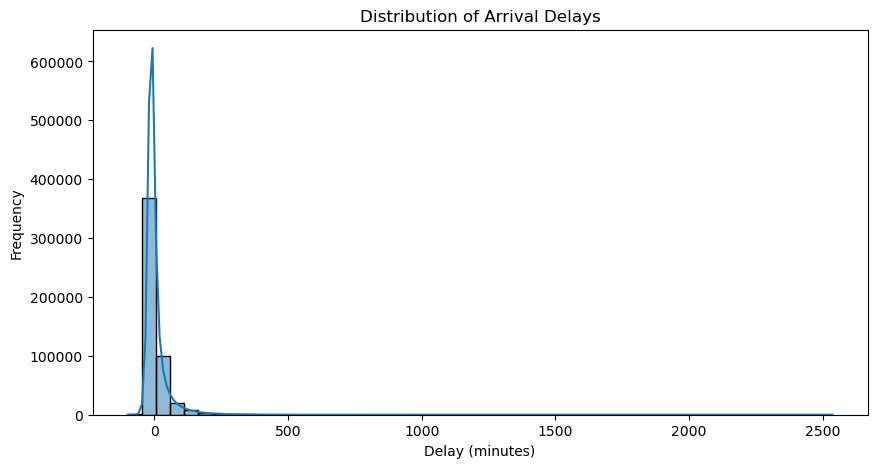

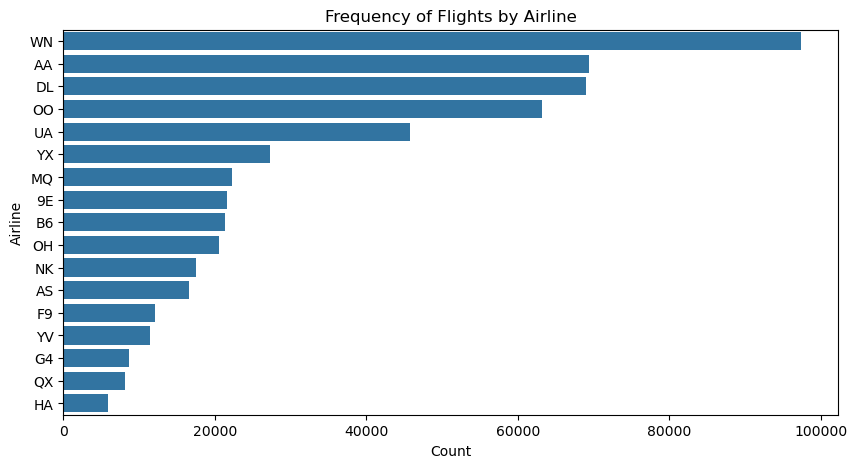

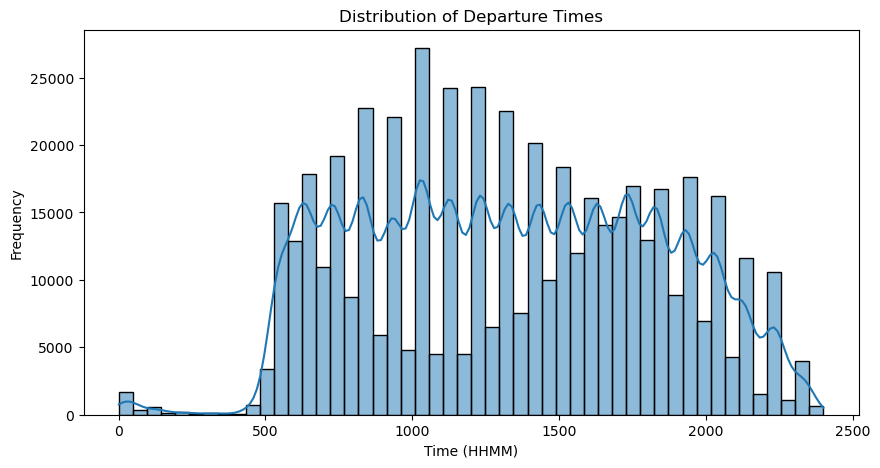

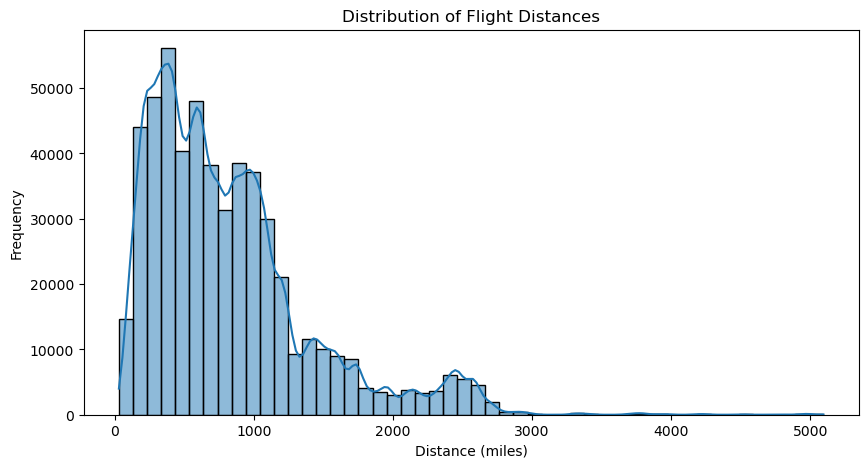

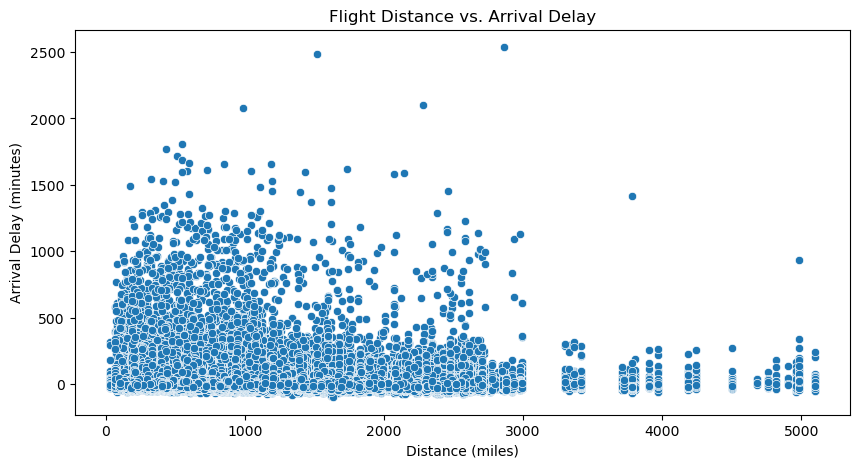

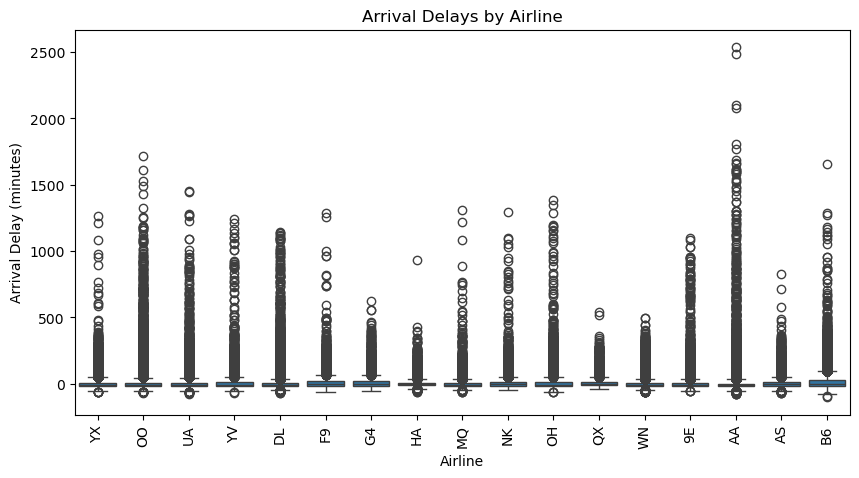

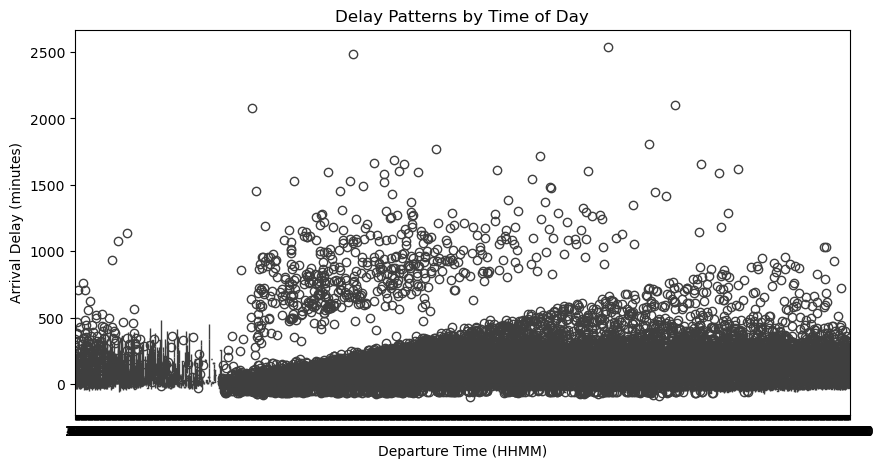

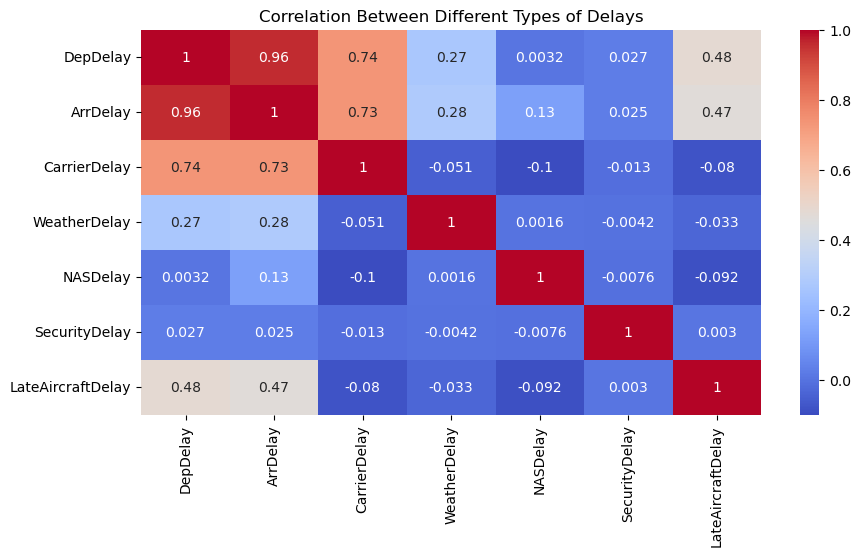


Key Findings:
- Arrival delays exhibit a right-skewed distribution, indicating that while most flights are on time, some experience significant delays.
- Flight frequency varies significantly across airlines, with some airlines operating more flights than others.
- Departure times are concentrated around peak hours.
- Longer flights do not necessarily have longer delays.
- Some airlines have a higher median delay than others, suggesting operational differences.
- Delays tend to increase for later departure times.
- Correlations between different types of delays suggest that certain delay types contribute more to overall arrival delays.

Actionable Insights:
- Airlines with consistently high delays should investigate operational inefficiencies.
- Passengers should consider scheduling flights earlier in the day to minimize the risk of delays.
- Further analysis on seasonal trends and airport-specific delays could yield additional insights.



In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset (update the file path accordingly)
df = pd.read_csv("On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2022_1.csv")

# Initial Data Exploration
# print("Dataset Overview:")
df.info()
# print("\nSummary Statistics:")
df.describe()
# print("\nMissing Values:")
df.isnull().sum()
# print("\nDuplicate Entries:")
df.duplicated().sum()
# print("\nSample Records:")
df.head()

# Univariate Analysis & Visualization
plt.figure(figsize=(10,5))
sns.histplot(df['ArrDelay'], bins=50, kde=True)
plt.title("Distribution of Arrival Delays")
plt.xlabel("Delay (minutes)")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(10,5))
sns.countplot(y=df['Reporting_Airline'], order=df['Reporting_Airline'].value_counts().index)
plt.title("Frequency of Flights by Airline")
plt.xlabel("Count")
plt.ylabel("Airline")
plt.show()

plt.figure(figsize=(10,5))
sns.histplot(df['DepTime'], bins=50, kde=True)
plt.title("Distribution of Departure Times")
plt.xlabel("Time (HHMM)")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(10,5))
sns.histplot(df['Distance'], bins=50, kde=True)
plt.title("Distribution of Flight Distances")
plt.xlabel("Distance (miles)")
plt.ylabel("Frequency")
plt.show()

# Bivariate and Multivariate Analysis & Visualization
plt.figure(figsize=(10,5))
sns.scatterplot(x=df['Distance'], y=df['ArrDelay'])
plt.title("Flight Distance vs. Arrival Delay")
plt.xlabel("Distance (miles)")
plt.ylabel("Arrival Delay (minutes)")
plt.show()

plt.figure(figsize=(10,5))
sns.boxplot(x=df['Reporting_Airline'], y=df['ArrDelay'])
plt.xticks(rotation=90)
plt.title("Arrival Delays by Airline")
plt.xlabel("Airline")
plt.ylabel("Arrival Delay (minutes)")
plt.show()

plt.figure(figsize=(10,5))
sns.boxplot(x=df['DepTime'], y=df['ArrDelay'])
plt.title("Delay Patterns by Time of Day")
plt.xlabel("Departure Time (HHMM)")
plt.ylabel("Arrival Delay (minutes)")
plt.show()

plt.figure(figsize=(10,5))
sns.heatmap(df[['DepDelay', 'ArrDelay', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Between Different Types of Delays")
plt.show()

# Final Report & Insights
report = """
Key Findings:
- Arrival delays exhibit a right-skewed distribution, indicating that while most flights are on time, some experience significant delays.
- Flight frequency varies significantly across airlines, with some airlines operating more flights than others.
- Departure times are concentrated around peak hours.
- Longer flights do not necessarily have longer delays.
- Delays tend to increase for later departure times.
- Correlations between different types of delays suggest that certain delay types contribute more to overall arrival delays.

Insights:
- Airlines with consistently high delays should investigate operational inefficiencies.
- Passengers should consider scheduling flights earlier in the day to minimize the risk of delays.
- Further analysis on seasonal trends and airport-specific delays could yield additional insights.
"""
print(report)
